In [4]:
#Excellent Resource
#http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [3]:
##my dataset
df = pd.read_csv("C:/Users/Rishabh.Sagar/Desktop/Clustering/Survey_Data.csv")

In [4]:
amount_of_clusters = [x for x in range(2, 11)] #change for amount of clusters. not inclusive of end of range

def print_metrics(metric, amount_of_clusters):
    for i in range(len(metric)):
        print('Cluster' + str(amount_of_clusters[i]) + ': ' + str(metric[i]))

In [5]:
silhouette = []
calinski_harabaz = []

#Agglomerative
for i in amount_of_clusters:
    model = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    silhouette.append(metrics.silhouette_score(df, model.fit_predict(df)))
    calinski_harabaz.append(metrics.calinski_harabaz_score(df, model.fit_predict(df)))
    
print('AGGLOMERATIVE')
print('Silhouette')    
print_metrics(silhouette, amount_of_clusters)
print('Calinski Harabaz')
print_metrics(calinski_harabaz, amount_of_clusters)

AGGLOMERATIVE
Silhouette
Cluster2: 0.10797419786397769
Cluster3: 0.0769327411017407
Cluster4: 0.055760649727090626
Cluster5: 0.03580979742361557
Cluster6: 0.01826027540607778
Cluster7: 0.021318041531418207
Cluster8: 0.00569233766566056
Cluster9: 0.00689971927299637
Cluster10: 0.010071647186632633
Calinski Harabaz
Cluster2: 281.518604517509
Cluster3: 197.41945558095287
Cluster4: 158.88842920278873
Cluster5: 135.52949019177152
Cluster6: 116.32024960012222
Cluster7: 103.19943428039866
Cluster8: 93.74745734240439
Cluster9: 85.5487707130544
Cluster10: 78.80477353244655


In [6]:
silhouette = []
calinski_harabaz = []

#Spectral
for i in amount_of_clusters:
    model = SpectralClustering(n_clusters=i, affinity='nearest_neighbors', assign_labels='kmeans')
    silhouette.append(metrics.silhouette_score(df, model.fit_predict(df)))
    calinski_harabaz.append(metrics.calinski_harabaz_score(df, model.fit_predict(df)))
    
print('SPECTRAL')
print('Silhouette')    
print_metrics(silhouette, amount_of_clusters)
print('Calinski Harabaz')
print_metrics(calinski_harabaz, amount_of_clusters)

SPECTRAL
Silhouette
Cluster2: 0.15368256746737277
Cluster3: 0.06530876332972632
Cluster4: -0.012339059018955517
Cluster5: -0.009804618777587445
Cluster6: -0.14072304637525324
Cluster7: -0.13791428083189827
Cluster8: -0.17788084010383154
Cluster9: -0.15744082833624262
Cluster10: -0.16610023856734926
Calinski Harabaz
Cluster2: 107.94788596190715
Cluster3: 177.04021252026277
Cluster4: 103.46872728721635
Cluster5: 95.40322267034537
Cluster6: 72.39347000041946
Cluster7: 62.47381941987008
Cluster8: 54.821921557431864
Cluster9: 51.6946701071723
Cluster10: 48.83358338804285


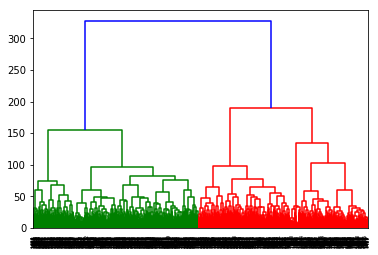

In [7]:
dendrogram(linkage(df, method='ward', metric='euclidean'))
plt.show()

In [8]:
#set number of clusters
n_clusters = 3

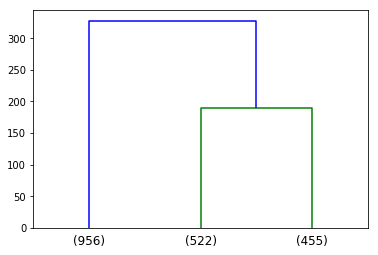

In [9]:
#dendrogram w/ only n clusters
dendrogram(linkage(df,method='ward', metric='euclidean'), truncate_mode='lastp',  p=n_clusters)
plt.show()

In [10]:
###COMMENT OUT THE MODEL YOU DON'T WANT TO USE###

#model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans')

#linkage - 'ward', 'complete', 'average', 'single'
#affinity - 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or ‘precomputed’
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='cityblock', linkage='complete')

if df.columns.contains('Group'):
    df['Group'] = model.fit_predict(df.drop('Group',axis=1))
else:
    df['Group'] = model.fit_predict(df)

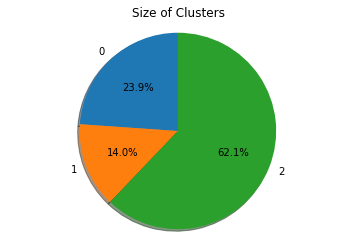

In [14]:
labels = np.sort(df['Group'].unique())
sizes = []
for i in labels:
    sizes.append(len(df[df['Group']==i]))

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Size of Clusters')
plt.show()

In [3]:
#Sorted variance for each question for the given cluster
#Adjust 'Group' number for which cluster you wish to look at. 0 = first cluster
_ = np.var(df[df['Group']==1]).sort_values()
data = np.array([_.index.values[:-1],_.values[:-1]])
data = pd.DataFrame(data=data[1:,1:],columns=data[0,1:])
data = data.astype(float)
plt.subplots(figsize=(10,10))
sns.heatmap(data)

NameError: name 'df' is not defined

In [24]:
questions = [
'Among my friends, I am the person who talks most about TV',
'I often choose TV content based on other people’s recommendations',
'I feel like I watch more TV than the average person',
'I typically watch TV alone',
'I often watch TV when I know I should be doing something else',
"I am a 'channel surfer'",
'I change channels when commercials come on',
'I typically know what I am going to watch before I turn on the TV',
'I have a set of channels I usually check',
'Watching TV helps me to escape, to get away from it all',
'I love watching TV',
'Watching TV is just a way to pass the time',
'I feel connected to other Quebecois when I watch TV',
"Watching TV is a great way to have 'family time'",
'Watching TV is the most relaxing part of my day',
'I use TV to keep in touch with what is going on in the world around me',
'I am trying to watch less TV',
'Watching TV is part of my daily routine',
'TV keeps me company',
'TV is a dying medium',
'Watching popular shows helps me feel culturally relevant',
'TV gives me something to talk about with others',
"I feel left out if I’m not watching the 'hottest' TV shows",
'I like to watch TV programs that challenge me to think',
'I like to re-watch content I’ve seen before',
'I often watch content recommended by my friends or family',
'TV content made in Quebec is better than TV content made elsewhere',
'I like watching the newest shows',
'I can never find anything to watch',
'My TV viewing is often dictated by what other people in my household want to watch',
'I mainly watch TV for sports',
'I prefer watching French language content',
'I prefer watching content with renowned actors',
]

Amount of surveys in cluster1: 462


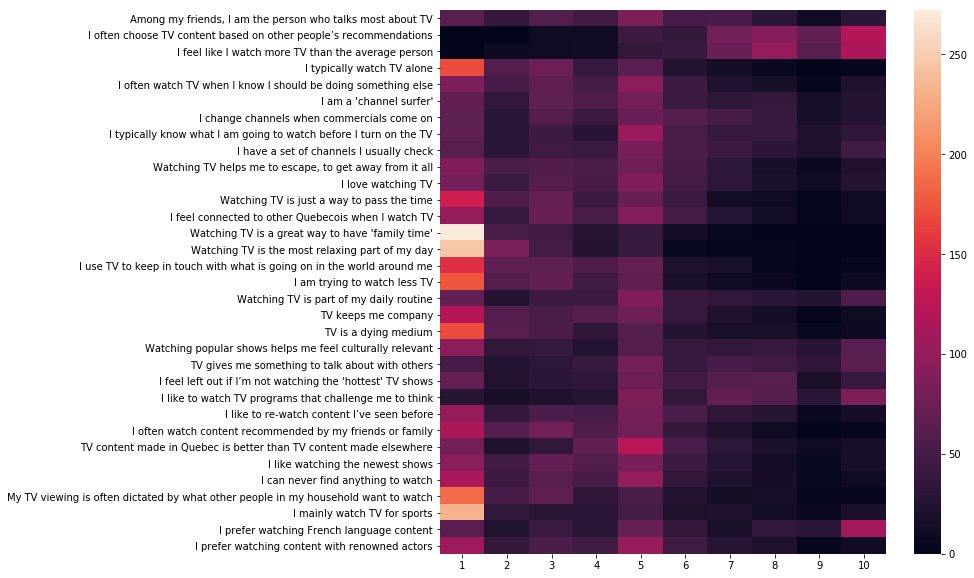

In [26]:
#Plot question frequency by cluster
#Adjust 'cluster_number' number for which cluster you wish to look at. 0 = first cluster
cluster_number = 0
data = []        
for q in df.columns[:-1]:
    data.append([])
    pos = len(data)-1
    for i in range(1,11):
        data[pos].append(len(df[(df['Group']==cluster_number) & (df[q]==i)]))
        
data = pd.DataFrame(data=data[:],index=questions,columns=list(range(1,11)))
plt.subplots(figsize=(10,10))
print('Amount of surveys in cluster' + str(cluster_number+1) + ': ' + str(len(df[df['Group']==cluster_number])))
sns.heatmap(data)